In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [81]:
df=pd.read_csv("Student Score.csv")

In [82]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [83]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [100]:
df.isnull().sum()

Gender                 0
EthnicGroup            1
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

# Drop Unnamed Column

In [90]:
df=df.drop("Unnamed: 0",axis=1)
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Fill Null Values with Forward Fill Method

In [98]:
df=df.fillna(method="ffill")

In [105]:
df.isnull().sum()

Gender                 0
EthnicGroup            1
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

# Gender Distribution

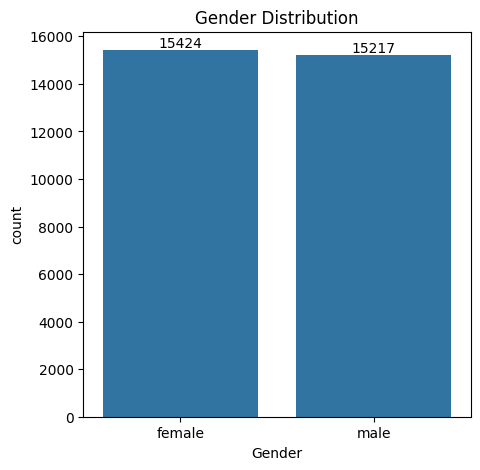

In [129]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df, x="Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

In [ ]:
# From the above chart we have analyzed that: the number of females in the data is more than the number of males.

# Impact of parent education on the scores of students (Using Group By)

In [116]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.210597     70.979075     70.156767
bachelor's degree   70.283134     72.866907     73.050847
high school         64.642243     67.421436     65.670195
master's degree     72.019852     75.433980     75.839797
some college        66.324692     69.086839     68.401190
some high school    62.830282     65.735329     63.918050


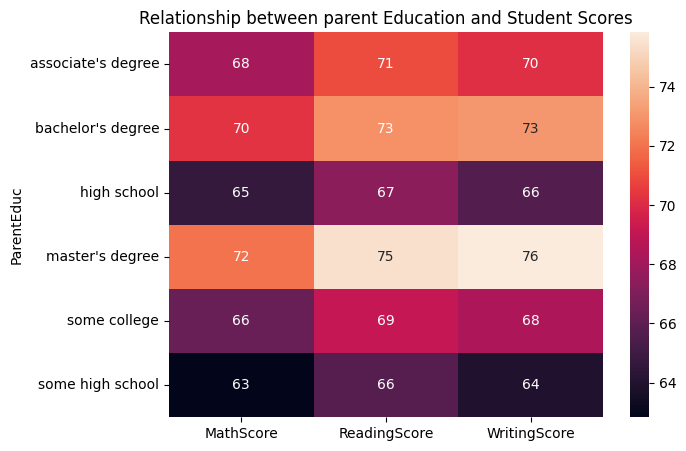

In [130]:
plt.figure(figsize=(7,5))
sns.heatmap(gb,annot=True)
plt.title("Relationship between parent Education and Student Scores")
plt.show()

In [ ]:
# From the above chart we have analyzed that: education of parents have a good impact on their students score

# Impact of parent Marital status on the scores of students (Using Group By)

gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

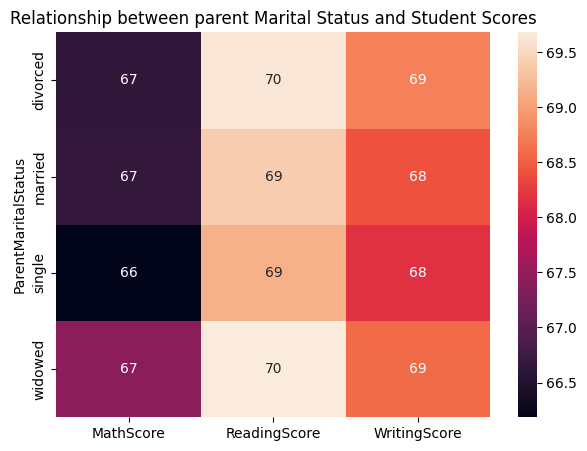

In [131]:
plt.figure(figsize=(7,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between parent Marital Status and Student Scores")
plt.show()

In [ ]:
# From the above chart we have analyzed that: Marital status of parents have a no/negligible impact on their students score

# Detect Outlier (MathScore)

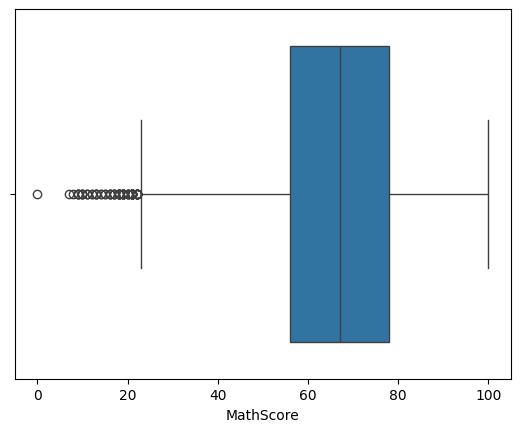

In [133]:
sns.boxplot(data=df,x="MathScore")
plt.show()

# Detect Outlier (Reading Score)

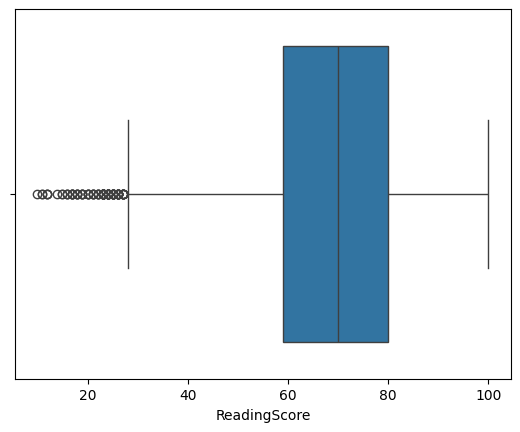

In [134]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

# Detect Outlier (Writing Score)

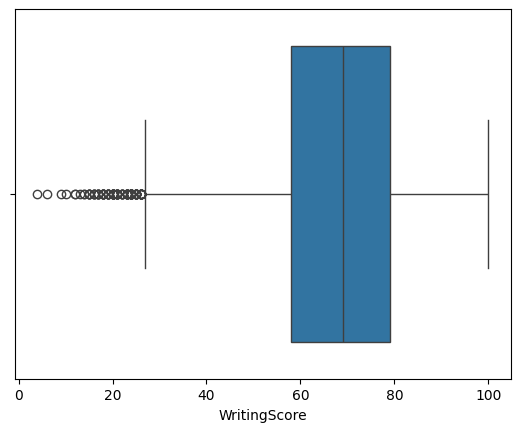

In [135]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [136]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethinic Groups

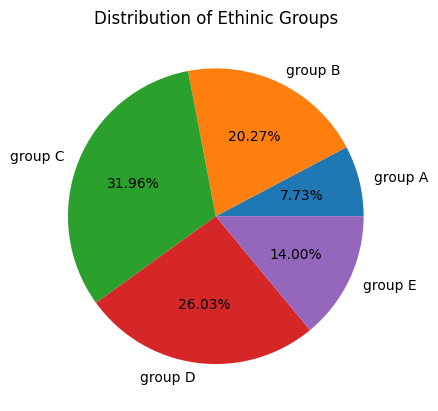

In [144]:
groupA = df.loc[(df['EthnicGroup']=="group A")].count()
groupB = df.loc[(df['EthnicGroup']=="group B")].count()
groupC = df.loc[(df['EthnicGroup']=="group C")].count()
groupD = df.loc[(df['EthnicGroup']=="group D")].count()
groupE = df.loc[(df['EthnicGroup']=="group E")].count()
l=['group A','group B','group C','group D', 'group E']
mlist=[groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]
plt.pie(mlist,labels=l,autopct="%1.2f%%")
plt.title("Distribution of Ethinic Groups")
plt.show()

[Text(0, 0, '9794'),
 Text(0, 0, '6212'),
 Text(0, 0, '2369'),
 Text(0, 0, '7975'),
 Text(0, 0, '4290')]

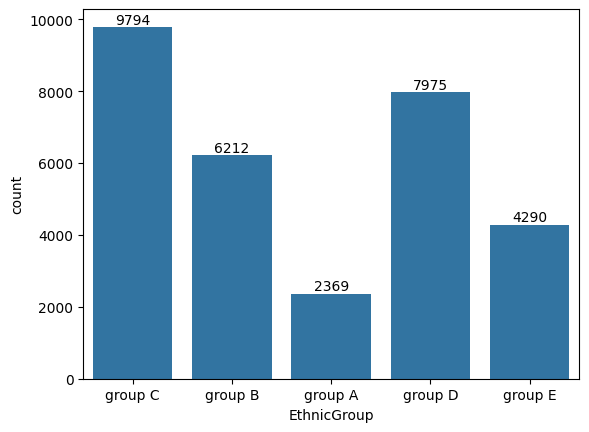

In [146]:
ax=sns.countplot(data=df,x="EthnicGroup")
ax.bar_label(ax.containers[0])

# Relationship between Lunch Type and Student Scores

In [147]:
gb2 = df.groupby("LunchType").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
print(gb2)

              MathScore  ReadingScore  WritingScore
LunchType                                          
free/reduced  58.862332     64.189735     62.650522
standard      70.709370     72.175634     71.529716


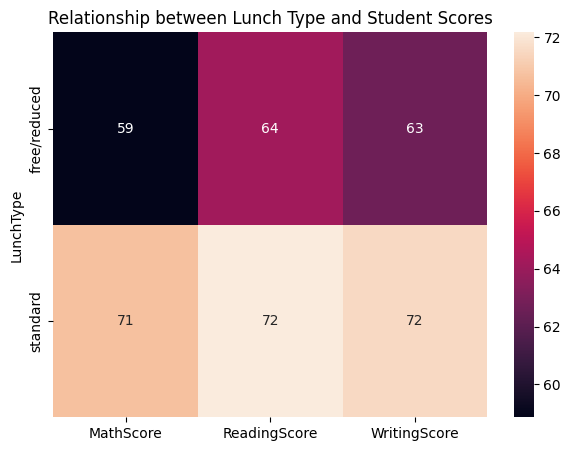

In [151]:
plt.figure(figsize=(7,5))
sns.heatmap(gb2,annot=True)
plt.title("Relationship between Lunch Type and Student Scores")
plt.show()